<h2>
libraries that we need
<h2>

In [1]:
import os
import pandas as pd
from collections import defaultdict
import re
import matplotlib.pyplot as plt
import seaborn as sns

<h2>
read csv files
</h2>

In [2]:
# Define the directory and group names
base_folder = r'E:\extracted_rar_files'
group_names = [
    'home_team_score',
    'home_team',
    'away_team',
    'away_team_score',
    'event',
    'round',
    'season',
    'time',
    'tournament',
    'venue',
    'odds',
    'pbp',
    'statistics',
    'power',
    'votes'
]

# Initialize a dictionary to store the DataFrames
grouped_data_frames = {}

# Read each CSV file into a DataFrame and store it in the dictionary
for group_name in group_names:
    csv_file_path = os.path.join(base_folder, f'{group_name}.csv')
    if os.path.exists(csv_file_path):
        df = pd.read_csv(csv_file_path)
        grouped_data_frames[group_name] = df
        print(f'Successfully read {group_name}.csv')
    else:
        print(f'File {group_name}.csv not found')

# Display the DataFrames (or perform further operations)
for group_name, df in grouped_data_frames.items():
    print(f'Group: {group_name}')
    # print(df.head())  # Print the first few rows of each DataFrame


Successfully read home_team_score.csv
Successfully read home_team.csv
Successfully read away_team.csv
Successfully read away_team_score.csv
Successfully read event.csv
Successfully read round.csv
Successfully read season.csv
Successfully read time.csv
Successfully read tournament.csv
Successfully read venue.csv
Successfully read odds.csv
Successfully read pbp.csv
Successfully read statistics.csv
Successfully read power.csv
Successfully read votes.csv
Group: home_team_score
Group: home_team
Group: away_team
Group: away_team_score
Group: event
Group: round
Group: season
Group: time
Group: tournament
Group: venue
Group: odds
Group: pbp
Group: statistics
Group: power
Group: votes


<h2>
check the shape of dataframes
</h2>

In [3]:
# Display the shape of each DataFrame
for group_name, df in grouped_data_frames.items():
    print(f'Group: {group_name}, Shape: {df.shape}')

Group: home_team_score, Shape: (19676, 14)
Group: home_team, Shape: (14090, 18)
Group: away_team, Shape: (12955, 18)
Group: away_team_score, Shape: (19676, 14)
Group: event, Shape: (19676, 10)
Group: round, Shape: (12087, 5)
Group: season, Shape: (19676, 4)
Group: time, Shape: (19676, 7)
Group: tournament, Shape: (19676, 16)
Group: venue, Shape: (19589, 5)
Group: odds, Shape: (33740, 11)
Group: pbp, Shape: (1467013, 13)
Group: statistics, Shape: (794368, 13)
Group: power, Shape: (269694, 5)
Group: votes, Shape: (19677, 3)


<h1>1. How many tennis players are included in the dataset?
<h1>

In [4]:
home_team = grouped_data_frames['home_team']
away_team = grouped_data_frames['away_team']

# Combine home and away team info into one DataFrame
players_info = pd.concat([
    home_team[['player_id', 'full_name']],
    away_team[['player_id', 'full_name']]
]).drop_duplicates().reset_index(drop=True)
number_of_tennis_players=len(players_info)

df_concat_gender = pd.concat([
    home_team[['player_id', 'full_name', 'gender']],
    away_team[['player_id', 'full_name', 'gender']]
]).drop_duplicates().reset_index(drop=True)

# Calculate the mean height for male and female players (including NaNs)
male = df_concat_gender[df_concat_gender['gender'] == 'M']
female = df_concat_gender[df_concat_gender['gender'] == 'F']

print(f'The number of unique tennis players in the dataset is: {number_of_tennis_players}')
print(f'The average height of female players is: {len(female['player_id'])}')
print(f'The average height of male players is: {len(male['player_id'])}')
print(f'6 players gender is unkown')

The number of unique tennis players in the dataset is: 2353
The average height of female players is: 1136
The average height of male players is: 1211
6 players gender is unkown


<h2  style="color:lightblue; font-family:Arial, sans-serif; font-size:35px;">

Pie chart of the number of tennis players
</h2>

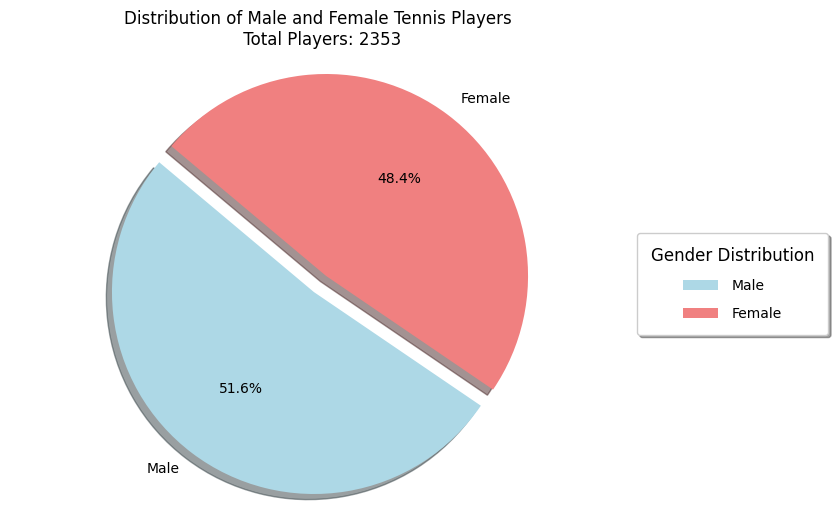

In [5]:
# Plotting the pie chart
male_n = len(male)
female_n = len(female)
labels = ['Male', 'Female']
sizes = [male_n, female_n]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Male)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Male and Female Tennis Players \n Total Players: %d' % number_of_tennis_players )


# Adding legend
plt.legend(labels, title='Gender Distribution', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium',
           borderpad=1, labelspacing=1, handlelength=2.5, handletextpad=1, title_fontsize='large',
           shadow=True, fancybox=True)

plt.show()

<h1>
2.What is the average height of the players?
</h1>

In [6]:
# Remove rows with missing values in the 'gender' column
df_cleaned_away_team = grouped_data_frames['away_team'].dropna(subset=['gender'])
df_cleaned_home_team = grouped_data_frames['home_team'].dropna(subset=['gender'])

# Concatenate cleaned home and away team dataframes, keeping relevant columns and dropping duplicates
df_concat_gender = pd.concat([
    df_cleaned_home_team[['player_id', 'full_name', 'gender', 'height']],
    df_cleaned_away_team[['player_id', 'full_name', 'gender', 'height']]
]).drop_duplicates().reset_index(drop=True)

# Calculate the mean height for male and female players (including NaNs)
mean_height_male_with_null = df_concat_gender[df_concat_gender['gender'] == 'M']['height'].mean()
mean_height_female_with_null = df_concat_gender[df_concat_gender['gender'] == 'F']['height'].mean()

# Number of missing gender values
num_missing = df_concat_gender['gender'].isna().sum()

# Function to fill missing height values based on gender
def fill_height(row):
    if pd.isna(row['height']):
        if row['gender'] == 'M':
            return mean_height_male_with_null
        elif row['gender'] == 'F':
            return mean_height_female_with_null
    return row['height']

# Apply the fill_height function to fill missing height values
df_concat_gender['height'] = df_concat_gender.apply(fill_height, axis=1)

# Calculate the mean height for male and female players (after filling NaNs)
mean_height_male = df_concat_gender[df_concat_gender['gender'] == 'M']['height'].mean()
mean_height_female = df_concat_gender[df_concat_gender['gender'] == 'F']['height'].mean()

# Calculate the overall mean height of players
mean_height_players = df_concat_gender['height'].mean()

# Print the results
print(f'The average height of female players is {mean_height_female}')
print(f'The average height of male players is {mean_height_male}')
print(f'The average height of players is {mean_height_players}')


The average height of female players is 1.7321576763485476
The average height of male players is 1.8423621227887617
The average height of players is 1.7891325324733314




<h2  style="color:lightblue; font-family:Arial, sans-serif; font-size:35px;">
Height Distribution by Gender

</h2>

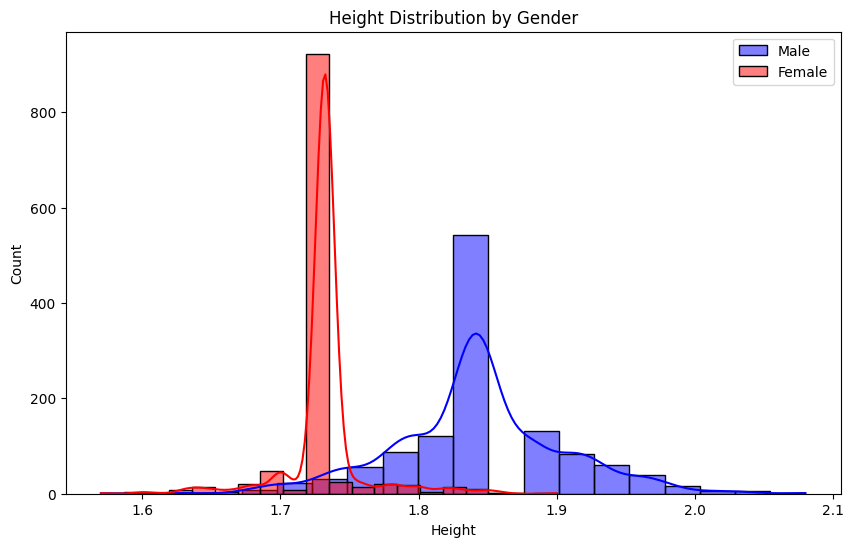

In [7]:
# Plot: Height Distribution by Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df_concat_gender[df_concat_gender['gender'] == 'M'], x='height', color='blue', label='Male', kde=True, bins=20)
sns.histplot(data=df_concat_gender[df_concat_gender['gender'] == 'F'], x='height', color='red', label='Female', kde=True, bins=20)
plt.title('Height Distribution by Gender')
plt.xlabel('Height')
plt.legend()
plt.show()

<h1>3.Which player has the highest number of wins?
</h1>

In [8]:
# Extract the 'pbp' dataframe from the grouped data frames
dffi = grouped_data_frames['pbp']

# Get the last row per 'match_id'
last_row_per_id = dffi.groupby('match_id').last().reset_index()

# Function to determine the winner based on the last row's points
def determine_winner(row):
    home_has_A = 'A' in str(row['home_point'])
    away_has_A = 'A' in str(row['away_point'])

    if home_has_A and not away_has_A:
        return 0  # Home team wins
    elif away_has_A and not home_has_A:
        return 1  # Away team wins
    elif '40' in [row['home_point'], row['away_point']]:
        return 0 if row['home_point'] == '40' else 1  # Determine winner based on '40' points
    else:
        return None

# Apply the determine_winner function to each row
last_row_per_id['Winner'] = last_row_per_id.apply(determine_winner, axis=1)

# Extract the 'home_team' dataframe and add 'h/a' column with value 0
df_home_new = grouped_data_frames['home_team']
df_home_new['h/a'] = 0

# Extract the 'away_team' dataframe and add 'h/a' column with value 1
df_away_new = grouped_data_frames['away_team']
df_away_new['h/a'] = 1

# Concatenate home and away team dataframes
df_home_away = pd.concat([df_home_new, df_away_new])

# Merge the team dataframe with the last row per id dataframe on 'match_id'
df_merge_team_pbp = pd.merge(df_home_away, last_row_per_id[['Winner', 'match_id']], on='match_id', how='inner')

# Select relevant columns and sort by 'match_id'
df_merge_team_pbp = df_merge_team_pbp[['match_id', 'name', 'gender', 'current_rank', 'h/a', 'Winner']].drop_duplicates(keep='last')

# Calculate the number of wins per player
wins_per_player = df_merge_team_pbp.groupby(['name', 'gender'])['Winner'].sum().reset_index(name='wins')
wins_per_player = wins_per_player.sort_values(by='wins', ascending=False)


# Separate wins per player by gender
wins_per_male = wins_per_player[wins_per_player['gender'] == 'M'].sort_values(by='wins', ascending=False)
wins_per_female = wins_per_player[wins_per_player['gender'] == 'F'].sort_values(by='wins', ascending=False)

# Print the player with the highest number of wins for each gender

print('2 male players with same number of wins:')

top_male_player = wins_per_male.iloc[0]
print(f"Male player with the highest number of wins: {top_male_player['name']} with {top_male_player['wins']} wins")

top_male_player = wins_per_male.iloc[1]
print(f"Male player with the highest number of wins: {top_male_player['name']} with {top_male_player['wins']} wins")

print('2 female players with same number of wins:')

top_female_player = wins_per_female.iloc[0]
print(f"Female player with the highest number of wins: {top_female_player['name']} with {top_female_player['wins']} wins")

top_female_player = wins_per_female.iloc[1]
print(f"Female player with the highest number of wins: {top_female_player['name']} with {top_female_player['wins']} wins")

# Print the top 5 players for each gender
print("\nTop 5 Male Players with Highest Wins:")
print(wins_per_male.head(5))

print("\nTop 5 Female Players with Highest Wins:")
print(wins_per_female.head(5))


2 male players with same number of wins:
Male player with the highest number of wins: Juszczak P. with 13 wins
Male player with the highest number of wins: Darderi L. with 13 wins
2 female players with same number of wins:
Female player with the highest number of wins: Uchijima M. with 14 wins
Female player with the highest number of wins: Hrdinkova D. with 14 wins

Top 5 Male Players with Highest Wins:
                       name gender  wins
895             Juszczak P.      M    13
422              Darderi L.      M    13
1987                Vale D.      M    11
1317             Musetti L.      M    10
711   Gueymard Wayenburg S.      M    10

Top 5 Female Players with Highest Wins:
              name gender  wins
1969   Uchijima M.      F    14
804   Hrdinkova D.      F    14
1683  Samsonova L.      F    13
325       Chang H.      F    11
641     Gavrilă O.      F    11



<h2  style="color:lightblue; font-family:Arial, sans-serif; font-size:35px;">

Bar plot of number of wins for first 5 players
</h2>


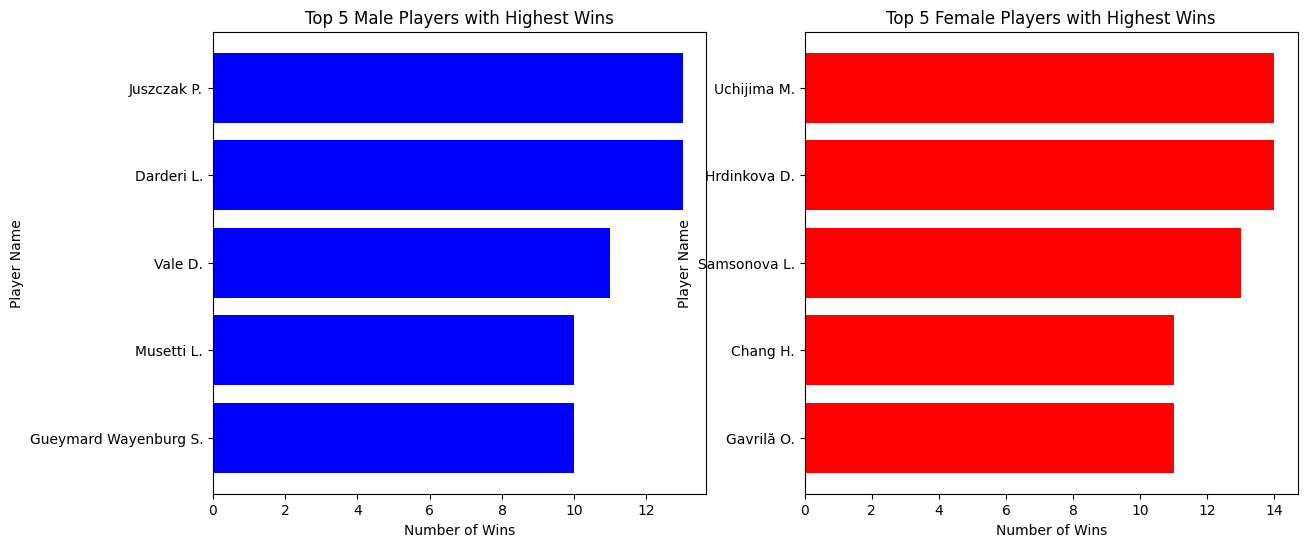

In [9]:
wins_per_male = wins_per_player[wins_per_player['gender'] == 'M'].sort_values(by='wins', ascending=False).head(5)
wins_per_female = wins_per_player[wins_per_player['gender'] == 'F'].sort_values(by='wins', ascending=False).head(5)
# bar chart for top 5 male players with highest wins
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# bar chart for top 5 male players with highest wins
ax[0].barh(wins_per_male['name'], wins_per_male['wins'], color='blue')
ax[0].set_title('Top 5 Male Players with Highest Wins')
ax[0].set_xlabel('Number of Wins')
ax[0].set_ylabel('Player Name')
ax[0].invert_yaxis()

# bar chart for top 5 female players with highest wins
ax[1].barh(wins_per_female['name'], wins_per_female['wins'], color='red')
ax[1].set_title('Top 5 Female Players with Highest Wins')
ax[1].set_xlabel('Number of Wins')
ax[1].set_ylabel('Player Name')
ax[1].invert_yaxis()

<h1>
4.What is the longest match recorded in terms of duration?
</h1>

In [10]:
# Extract the 'time' dataframe from the grouped data frames
df_time = grouped_data_frames['time']

# Find rows where 'current_period_start_timestamp' is NaN
df_time[df_time['current_period_start_timestamp'].isna()]

# Convert 'current_period_start_timestamp' to datetime
df_time['datetime'] = pd.to_datetime(df_time['current_period_start_timestamp'], unit='s')

# Define columns to check for NaN values
columns_to_check = df_time.columns[1:6]

# Drop rows where all the specified columns have NaN values
df_time_filtered = df_time.dropna(subset=columns_to_check, how='all')

# Sum the specified columns to check for match recorded data
match_recorded_column_data = df_time.iloc[:, 1:6].sum(axis=1)

# Define the new column name
column_name = 'Match recorded'

# Insert the new column if it doesn't exist
if column_name not in df_time.columns:
    df_time.insert(loc=6, column=column_name, value=match_recorded_column_data)

# Define the condition for valid match durations
condition = match_recorded_column_data <= 39600  # The longest tennis set lasted 11 hours (39600 seconds)

# Check if any row satisfies the condition
if condition.any():
    # Get the row with the maximum match duration within the valid condition
    max_row = df_time.loc[condition].iloc[:, 0:5].sum(axis=1).idxmax()
    
    # Drop the specified columns from the dataframe
    df_time = df_time.drop(columns=df_time.columns[1:6])
    
    # Get the result row with the maximum match duration
    result_row = df_time.loc[max_row]

    # Print the result in hours
    print(f'The longest match_id was {result_row['match_id']} and lasted {result_row["Match recorded"] / 3600} hours')


The longest match_id was 12381286 and lasted 7.843333333333334 hours


<h1>5.How many sets are typically played in a tennis match?
</h1>

In [11]:
# Extract the 'home_team_score' dataframe from the grouped data frames
home_team_score_df = grouped_data_frames['home_team_score']

# Extract the 'home_team' dataframe to get gender information
home_team_df = grouped_data_frames['home_team']

# Merge the score dataframe with the team dataframe to get gender information
home_team_score_df = home_team_score_df.merge(home_team_df[['match_id', 'gender']], on='match_id', how='left')

# Define the columns representing the periods
period_columns = ['period_1', 'period_2', 'period_3', 'period_4', 'period_5']

# Count non-null values across the specified columns for each row
home_team_score_df['filled_columns_count'] = home_team_score_df[period_columns].count(axis=1)

# Separate data by gender
male_team_score_df = home_team_score_df[home_team_score_df['gender'] == 'M']
female_team_score_df = home_team_score_df[home_team_score_df['gender'] == 'F']

# Find the mode of the filled columns count for each gender
mode_sets_count_male = male_team_score_df['filled_columns_count'].mode().values[0]
mode_sets_count_female = female_team_score_df['filled_columns_count'].mode().values[0]

# Print the typical number of sets played in a tennis match for each gender
print(f"Typically, {mode_sets_count_male} sets are played in a male tennis match.")
print(f"Typically, {mode_sets_count_female} sets are played in a female tennis match.")


Typically, 2 sets are played in a male tennis match.
Typically, 2 sets are played in a female tennis match.


<h2  style="color:lightblue; font-family:Arial, sans-serif; font-size:35px;">
Plot
</h2>

C:\Users\Amir\AppData\Local\Temp\ipykernel_45732\4023523454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='filled_columns_count', data=male_team_score_df, palette='viridis', ax=axs[0])
C:\Users\Amir\AppData\Local\Temp\ipykernel_45732\4023523454.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='filled_columns_count', data=female_team_score_df, palette='viridis', ax=axs[1])


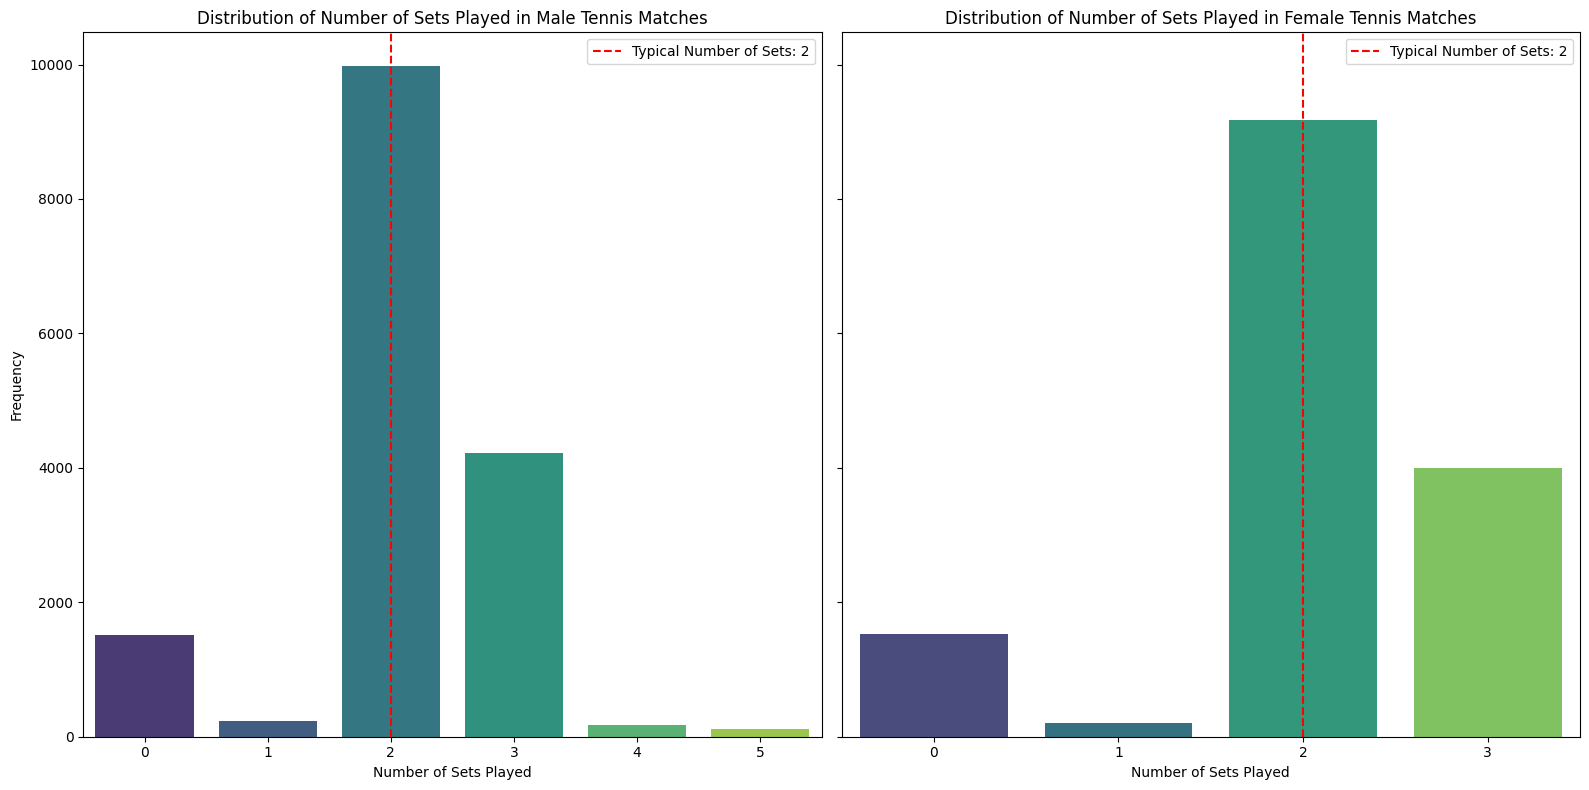

In [12]:
# Plotting the distribution of filled columns count for males and females
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

sns.countplot(x='filled_columns_count', data=male_team_score_df, palette='viridis', ax=axs[0])
axs[0].set_title('Distribution of Number of Sets Played in Male Tennis Matches')
axs[0].set_xlabel('Number of Sets Played')
axs[0].set_ylabel('Frequency')
axs[0].axvline(x=mode_sets_count_male - 0, color='red', linestyle='--', label=f'Typical Number of Sets: {mode_sets_count_male}')
axs[0].legend()

sns.countplot(x='filled_columns_count', data=female_team_score_df, palette='viridis', ax=axs[1])
axs[1].set_title('Distribution of Number of Sets Played in Female Tennis Matches')
axs[1].set_xlabel('Number of Sets Played')
axs[1].set_ylabel('Frequency')
axs[1].axvline(x=mode_sets_count_female - 0, color='red', linestyle='--', label=f'Typical Number of Sets: {mode_sets_count_female}')
axs[1].legend()

plt.tight_layout()
plt.show()

<h1>
6.Which country has produced the most successful tennis players?
</h1>

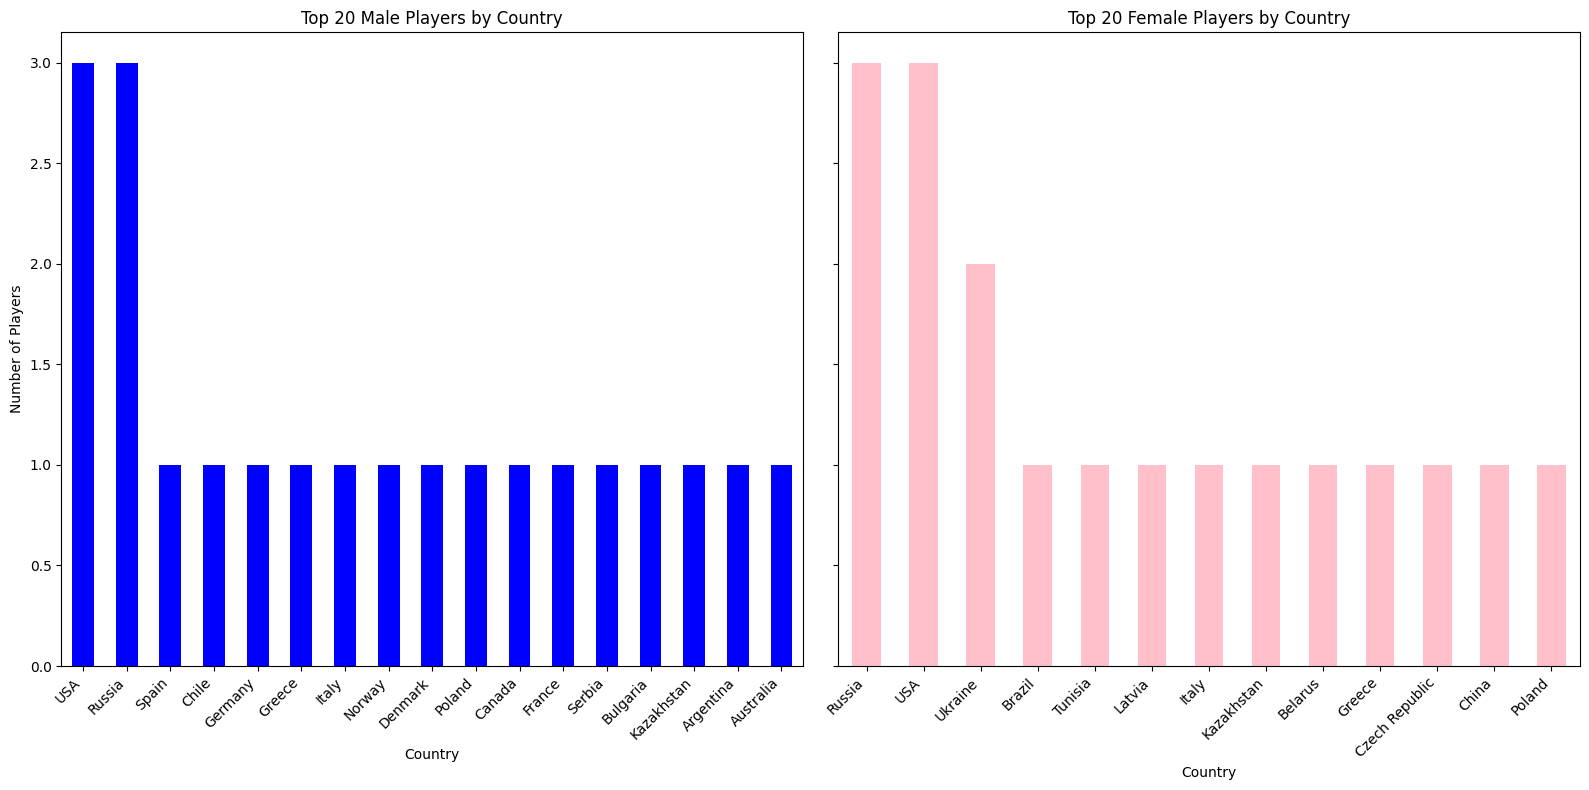

Countries with the maximum number of top 20 male players: USA, Russia
Countries with the maximum number of top 20 female players: Russia, USA


In [13]:
# Concatenate the home and away team dataframes
df_all_rank = pd.concat([grouped_data_frames['home_team'], grouped_data_frames['away_team']])

# Filter players with a current rank of 20 or better
df_rank = df_all_rank[df_all_rank['current_rank'] <= 20]

# Drop unnecessary columns
df_rank_w = df_rank.drop(columns=['match_id', 'user_count', 'current_prize', 'total_prize'])

# Drop duplicate rows
df_rank_duplicates = df_rank_w.drop_duplicates()

# Sort the dataframe by current rank in ascending order
sorted_df = df_rank_duplicates.sort_values(by='current_rank', ascending=True)

# Group by player name and get the first occurrence for each player
df_unique_rank = sorted_df.groupby('name').first().reset_index()

# Separate data by gender
df_male_rank = df_unique_rank[df_unique_rank['gender'] == 'M']
df_female_rank = df_unique_rank[df_unique_rank['gender'] == 'F']

# Get the value counts of the countries for males
value_counts_male = df_male_rank['country'].value_counts()

# Get the value counts of the countries for females
value_counts_female = df_female_rank['country'].value_counts()

# Plotting the value counts as bar charts
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Male players' country distribution
value_counts_male.plot(kind='bar', color='blue', ax=axs[0])
axs[0].set_title('Top 20 Male Players by Country')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Number of Players')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Female players' country distribution
value_counts_female.plot(kind='bar', color='pink', ax=axs[1])
axs[1].set_title('Top 20 Female Players by Country')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Number of Players')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Find the countries with the maximum value for males and females
max_index_male = value_counts_male.idxmax()
countries_with_max_value_male = value_counts_male[value_counts_male == value_counts_male[max_index_male]].index.tolist()

max_index_female = value_counts_female.idxmax()
countries_with_max_value_female = value_counts_female[value_counts_female == value_counts_female[max_index_female]].index.tolist()

# Print the countries with the maximum value for males and females
print(f"Countries with the maximum number of top 20 male players: {', '.join(map(str, countries_with_max_value_male))}")
print(f"Countries with the maximum number of top 20 female players: {', '.join(map(str, countries_with_max_value_female))}")


<h1>7.What is the average number of aces per match?
</h1>

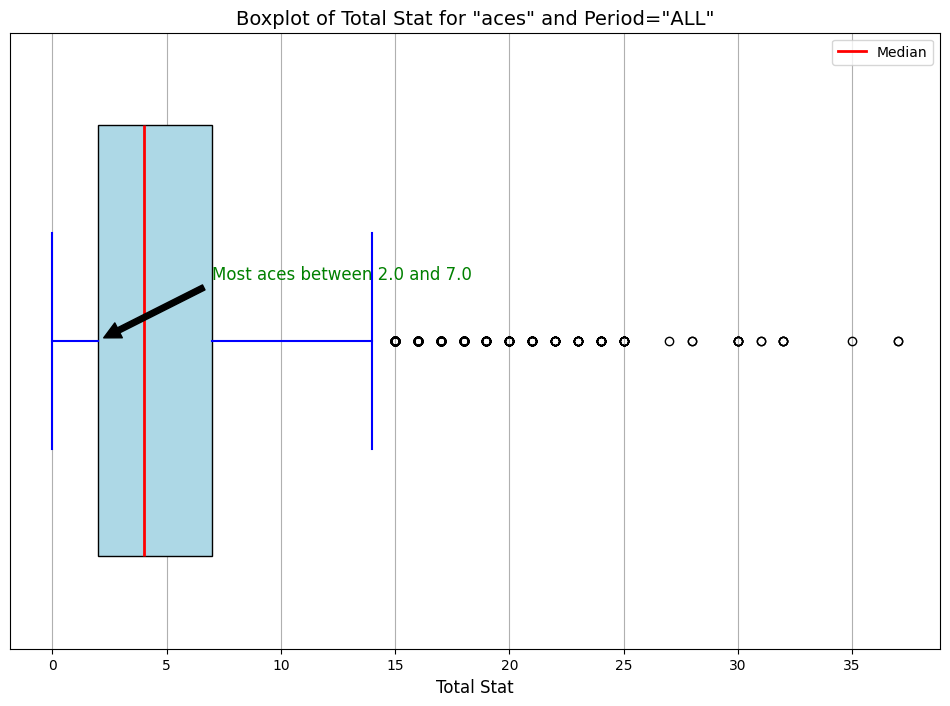

Mean of total_stat: 4.88
Median of total_stat: 4.00
the average number of aces per match is 4.88


In [14]:
statistics_df = grouped_data_frames['statistics']

# Filter statistics dataframe for rows where statistic_name is 'aces' and period is 'ALL'
aces_df = statistics_df[(statistics_df['statistic_name'] == 'aces') & (statistics_df['period'] == 'ALL')].copy()

# Convert 'home_stat' and 'away_stat' to numeric if they are not already
aces_df['home_stat'] = pd.to_numeric(aces_df['home_stat'], errors='coerce')
aces_df['away_stat'] = pd.to_numeric(aces_df['away_stat'], errors='coerce')

# Calculate the total_stat as the sum of home_stat and away_stat
aces_df['total_stat'] = aces_df['home_stat'] + aces_df['away_stat']

# Drop duplicates
aces_df=aces_df.drop_duplicates(keep='last')

# Create the boxplot
plt.figure(figsize=(12, 8))
boxprops = dict(facecolor='lightblue', color='black')
medianprops = dict(color='red', linewidth=2)
whiskerprops = dict(color='blue', linewidth=1.5)
capprops = dict(color='blue', linewidth=1.5)

plt.boxplot(aces_df['total_stat'], vert=False, patch_artist=True, widths=0.7, 
            boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)

plt.title('Boxplot of Total Stat for "aces" and Period="ALL"', fontsize=14)
plt.xlabel('Total Stat', fontsize=12)
plt.yticks([], [])
plt.grid(True)

# Add a legend for the median
plt.legend([plt.Line2D([0], [0], color='red', lw=2)], ['Median'], loc='upper right')

# Calculate the interquartile range (IQR)
q25, q75 = aces_df['total_stat'].quantile(0.25), aces_df['total_stat'].quantile(0.75)

# Annotate the IQR range
plt.annotate(f'Most aces between {q25:.1f} and {q75:.1f}', xy=(q25, 1), xytext=(q25 + 5, 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='green')

plt.show()

# Calculate and print mean and median
mean_total_stat = aces_df['total_stat'].mean()
median_total_stat = aces_df['total_stat'].median()
print(f"Mean of total_stat: {mean_total_stat:.2f}")
print(f"Median of total_stat: {median_total_stat:.2f}")
print(f'the average number of aces per match is {mean_total_stat:.2f}')


<h1>
8.Is there a difference in the number of double faults based on gender?
</h1>

The average double faults of men is 5.503915246430217
The average double faults of women is 7.221408589764686


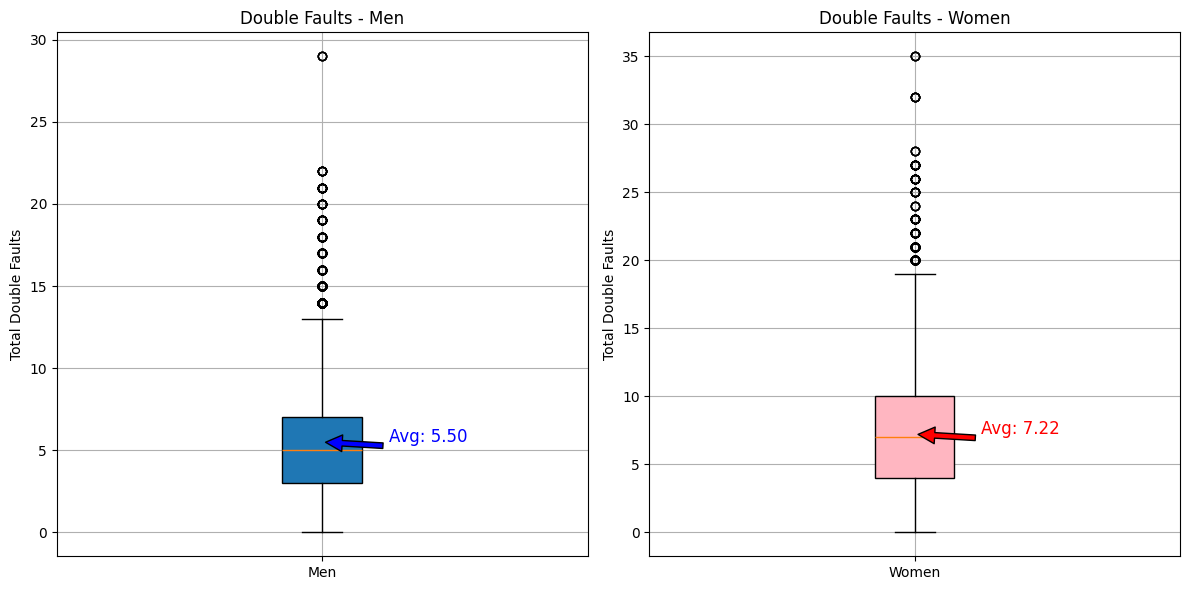

In [15]:
# Extract the 'statistics' and 'home_team' dataframes from the grouped data frames
statistics_df = grouped_data_frames['statistics']
home_team_df = grouped_data_frames['home_team']

# Filter the statistics dataframe for rows where 'statistic_name' is 'double_faults' and 'period' is 'ALL'
double_faults_df = statistics_df[(statistics_df['statistic_name'] == 'double_faults') & (statistics_df['period'] == 'ALL')].copy()

# Convert 'home_stat' and 'away_stat' to numeric, coerce errors to NaN
double_faults_df['home_stat'] = pd.to_numeric(double_faults_df['home_stat'], errors='coerce')
double_faults_df['away_stat'] = pd.to_numeric(double_faults_df['away_stat'], errors='coerce')

# Calculate 'total_stat' as the sum of 'home_stat' and 'away_stat'
double_faults_df['total_stat'] = double_faults_df['home_stat'] + double_faults_df['away_stat']

# Extract the 'match_id' and 'gender' columns from the home team dataframe
player_gender = home_team_df[['match_id', 'gender']]

# Merge the player gender information with the double faults dataframe
double_faults = double_faults_df.merge(player_gender, on='match_id', how='left')

# Separate the data into men and women
double_faults_women = double_faults[double_faults['gender'] == 'F']
double_faults_men = double_faults[double_faults['gender'] == 'M']

# Calculate the average double faults for men and women
average_double_faults_men = double_faults_men['total_stat'].mean()
average_double_faults_women = double_faults_women['total_stat'].mean()

# Print the average double faults
print(f'The average double faults of men is {average_double_faults_men}')
print(f'The average double faults of women is {average_double_faults_women}')

# Plot the boxplots
plt.figure(figsize=(12, 6))


# Boxplot for men
plt.subplot(1, 2, 1)
plt.boxplot(double_faults_men['total_stat'].dropna(), patch_artist=True)
plt.title('Double Faults - Men')
plt.ylabel('Total Double Faults')
plt.xticks([1], ['Men'])
plt.grid(True)
plt.annotate(f'Avg: {average_double_faults_men:.2f}', xy=(1, average_double_faults_men), xytext=(1.2, average_double_faults_men),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12, color='blue', ha='center')
# Boxplot for women
plt.subplot(1, 2, 2)
plt.boxplot(double_faults_women['total_stat'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightpink'))
plt.title('Double Faults - Women')
plt.ylabel('Total Double Faults')
plt.xticks([1], ['Women'])
plt.grid(True)
plt.annotate(f'Avg: {average_double_faults_women:.2f}', xy=(1, average_double_faults_women), xytext=(1.2, average_double_faults_women),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red', ha='center')
# Add annotations



plt.tight_layout()
plt.show()

<h1>9.Which player has won the most tournaments in a single month?
</h1>

In [16]:
# Filter for final matches and remove duplicates
final_matches = grouped_data_frames['round'][grouped_data_frames['round']['name'] == 'Final'].reset_index(drop=True)
final_matches = final_matches.drop_duplicates()

# Remove duplicate tournaments
tournament_without_duplicates = grouped_data_frames['tournament'].drop_duplicates()

# Merge final matches with tournaments and remove duplicates
merged_tournament_final_matches = pd.merge(
    final_matches[['match_id', 'round_id', 'name']],
    tournament_without_duplicates[['match_id', 'tournament_name']],
    on='match_id',
    how='inner'
).drop_duplicates()

#Merge with team and play-by-play (pbp) data
merged_df_pbp_tournament = pd.merge(
    df_merge_team_pbp[['match_id', 'name', 'Winner', 'h/a', 'gender']],
    merged_tournament_final_matches,
    on='match_id',
    how='inner'
)

# Filter by matches where the winner is the home/away team and remove duplicates
filtered_df_pbp_tournament = merged_df_pbp_tournament[
    merged_df_pbp_tournament['Winner'] == merged_df_pbp_tournament['h/a']
].drop_duplicates().reset_index(drop=True)

# the filtered DataFrame
filtered_df_pbp_tournament=filtered_df_pbp_tournament.value_counts('name_x')
top_player = filtered_df_pbp_tournament.idxmax()
max_wins = filtered_df_pbp_tournament.max()

print(f"The player with the most wins is {top_player} with {max_wins} wins.")

The player with the most wins is Uchijima M. with 3 wins.


<h2  style="color:lightblue; font-family:Arial, sans-serif; font-size:35px;">

Barplot for top 5 players
</h2>


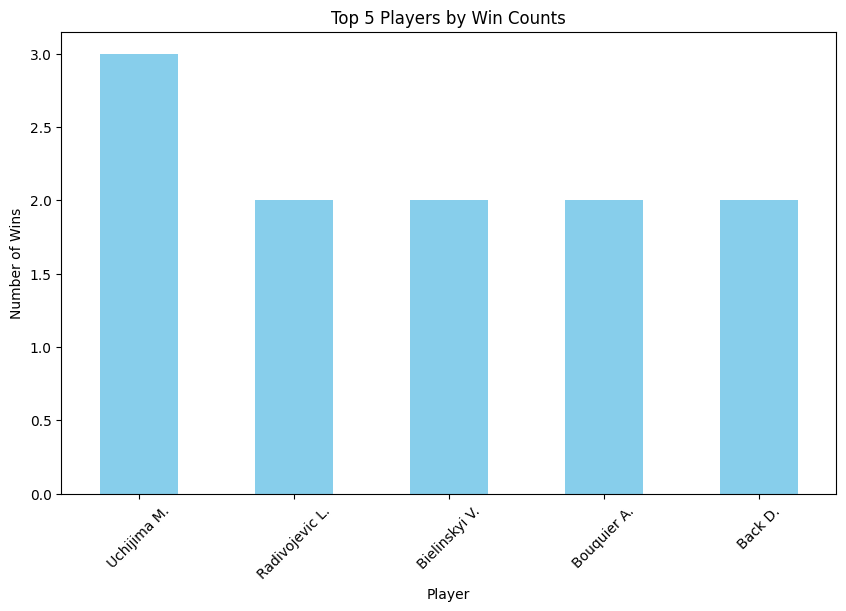

In [17]:
# Extracting the top 5 players based on filtered data
top_5_players = filtered_df_pbp_tournament.head(5)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_5_players.plot(kind='bar', color='skyblue')
plt.title('Top 5 Players by Win Counts')
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


<h1>
10.Is there a correlation between a player's height and their ranking?
</h1>

In [18]:
# Combine away_team and home_team DataFrames
df_concat_team = pd.concat([grouped_data_frames['away_team'], grouped_data_frames['home_team']])

# Drop unnecessary columns and duplicates
df_concat_team = df_concat_team.drop(columns=['match_id', 'user_count', 'current_prize', 'total_prize'])
df_concat_team = df_concat_team.drop_duplicates()

# Group by player name and keep the first occurrence for each player
df_concat_team = df_concat_team.groupby('name').first().reset_index()

# Calculate the Pearson correlation coefficient between height and current rank
correlation = df_concat_team['height'].corr(df_concat_team['current_rank'])

# Categorize the correlation strength
if correlation >= 0.7 or correlation <= -0.7:
    correlation_category = "Strong correlation"
elif 0.4 <= correlation < 0.7 or -0.4 >= correlation > -0.7:
    correlation_category = "Moderate correlation"
elif 0.1 <= correlation < 0.4 or -0.1 >= correlation > -0.4:
    correlation_category = "Weak correlation"
else:
    correlation_category = "Very weak or no correlation"

# Print the correlation and its category
print(f"The correlation between height and ranking is: {correlation}")
print(f"This correlation is categorized as: {correlation_category}")


The correlation between height and ranking is: 0.08609144624811947
This correlation is categorized as: Very weak or no correlation


<h1>11.What is the average duration of matches?
</h1>

The average duration of matches for men is 101.29 minutes.
The average duration of matches for women is 104.26 minutes.


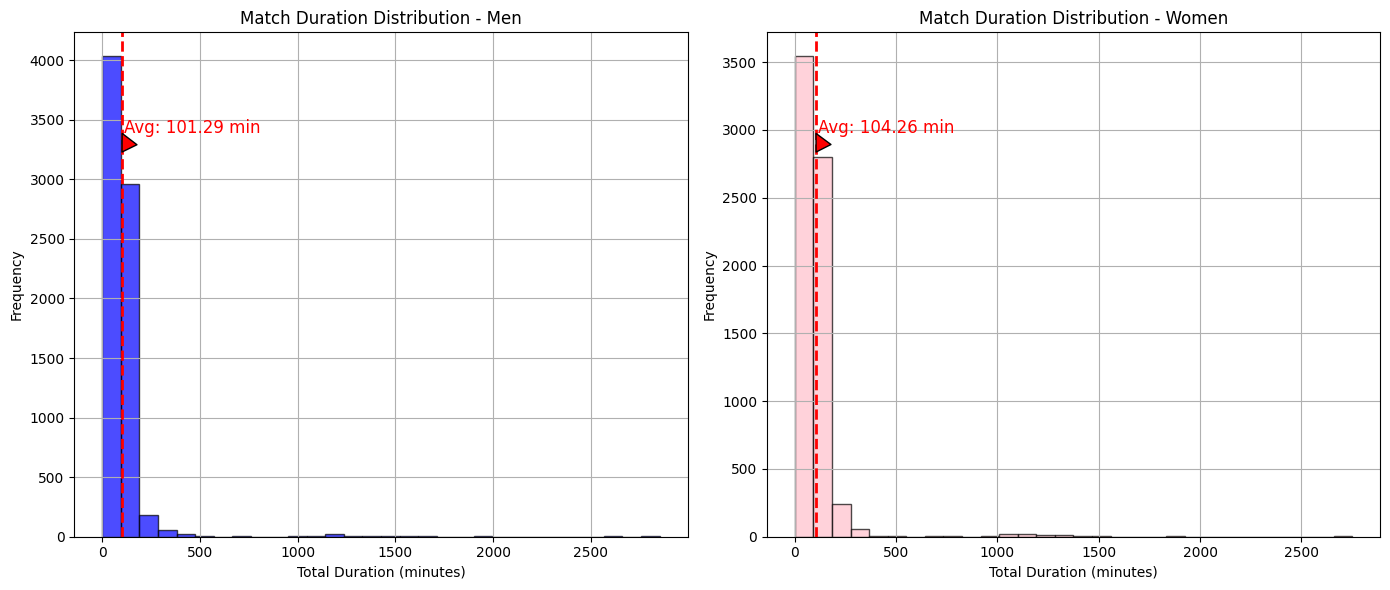

In [148]:
# Extract the 'time' and 'home_team' dataframes from the grouped data frames
time_df = grouped_data_frames['time']
home_team_df = grouped_data_frames['home_team']

# Ensure all period columns are treated as numeric, and NaNs are handled
time_df = time_df[['match_id', 'period_1', 'period_2', 'period_3', 'period_4', 'period_5']].apply(pd.to_numeric, errors='coerce')

# Calculate the total duration for each match by summing the periods
time_df['total_duration'] = time_df[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].sum(axis=1, skipna=True)

# Extract the 'match_id' and 'gender' columns from the home team dataframe
match_gender = home_team_df[['match_id', 'gender']].drop_duplicates()

# Merge the match duration data with the gender information
time_with_gender = time_df.merge(match_gender, on='match_id', how='left')

# Separate the data into men and women
time_men = time_with_gender[time_with_gender['gender'] == 'M']
time_women = time_with_gender[time_with_gender['gender'] == 'F']

# Calculate the average duration for men and women in minutes
average_duration_men = time_men['total_duration'].mean() / 60
average_duration_women = time_women['total_duration'].mean() / 60

# Print the average durations
print(f"The average duration of matches for men is {average_duration_men:.2f} minutes.")
print(f"The average duration of matches for women is {average_duration_women:.2f} minutes.")

# Plot histograms
plt.figure(figsize=(14, 6))

# Histogram for men
plt.subplot(1, 2, 1)
plt.hist(time_men['total_duration'].dropna() / 60, bins=30, edgecolor='k', alpha=0.7, color='blue')
plt.axvline(average_duration_men, color='r', linestyle='dashed', linewidth=2)
plt.title('Match Duration Distribution - Men')
plt.xlabel('Total Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.annotate(f'Avg: {average_duration_men:.2f} min', 
             xy=(average_duration_men, plt.ylim()[1] * 0.8), 
             xytext=(average_duration_men + 10, plt.ylim()[1] * 0.8),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Histogram for women
plt.subplot(1, 2, 2)
plt.hist(time_women['total_duration'].dropna() / 60, bins=30, edgecolor='k', alpha=0.7, color='pink')
plt.axvline(average_duration_women, color='r', linestyle='dashed', linewidth=2)
plt.title('Match Duration Distribution - Women')
plt.xlabel('Total Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.annotate(f'Avg: {average_duration_women:.2f} min', 
             xy=(average_duration_women, plt.ylim()[1] * 0.8), 
             xytext=(average_duration_women + 10, plt.ylim()[1] * 0.8),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

plt.tight_layout()
plt.show()


<h1>
12-What is the average number of games per set in men's matches compared to women's matches?
</h1>

Average total games per set by gender:
gender
F    20.512120
M    21.599032
Name: total_games_won, dtype: float64


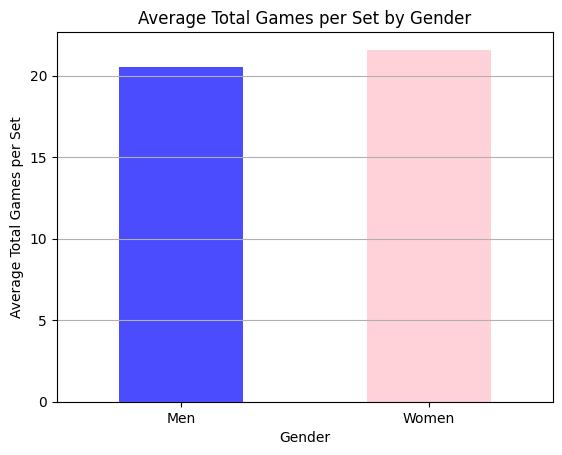

In [151]:
statistics = grouped_data_frames['statistics']
home_team = grouped_data_frames['home_team']
away_team = grouped_data_frames['away_team']

# Filter statistics DataFrame for points totals
filtered1_statistics = statistics[
    (statistics['statistic_category_name'] == 'games') &
    (statistics['statistic_name'] == 'total_won')
][['match_id', 'home_stat', 'away_stat']]

# Convert columns to numeric (if they are stored as strings)
filtered1_statistics['home_stat'] = pd.to_numeric(filtered1_statistics['home_stat'], errors='coerce')
filtered1_statistics['away_stat'] = pd.to_numeric(filtered1_statistics['away_stat'], errors='coerce')

# Create a new column that sums home_stat and away_stat
filtered1_statistics['total_games_won'] = filtered1_statistics['home_stat'] + filtered1_statistics['away_stat']

# Merge home_team with filtered1_statistics on match_id
merged_data = pd.merge(filtered1_statistics, home_team[['match_id', 'gender']], on='match_id', how='left')

# Calculate average total_games_won by gender
average_games_won = merged_data.groupby('gender')['total_games_won'].mean()

print("Average total games per set by gender:")
print(average_games_won)

# Plotting the average total games won by gender
average_games_won.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title('Average Total Games per Set by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Games per Set')
plt.xticks(ticks=[0, 1], labels=['Men', 'Women'], rotation=0)
plt.grid(axis='y')
plt.show()

<h1>13.What is the distribution of left-handed versus right-handed players?
</h1>

Unique values in 'plays' column:
['left-handed' 'right-handed' nan 'ambidextrous']
Number of missing or NaN values in 'plays' column: 1323
Initial Distribution of Left-handed vs Right-handed players:
plays
unknown         1323
right-handed     908
left-handed      120
ambidextrous       1
Name: count, dtype: int64
Known values distribution for imputation:
plays
right-handed    0.882410
left-handed     0.116618
ambidextrous    0.000972
Name: proportion, dtype: float64
Distribution of Left-handed vs Right-handed players after imputation:
plays
right-handed    2061
left-handed      286
ambidextrous       5
Name: count, dtype: int64


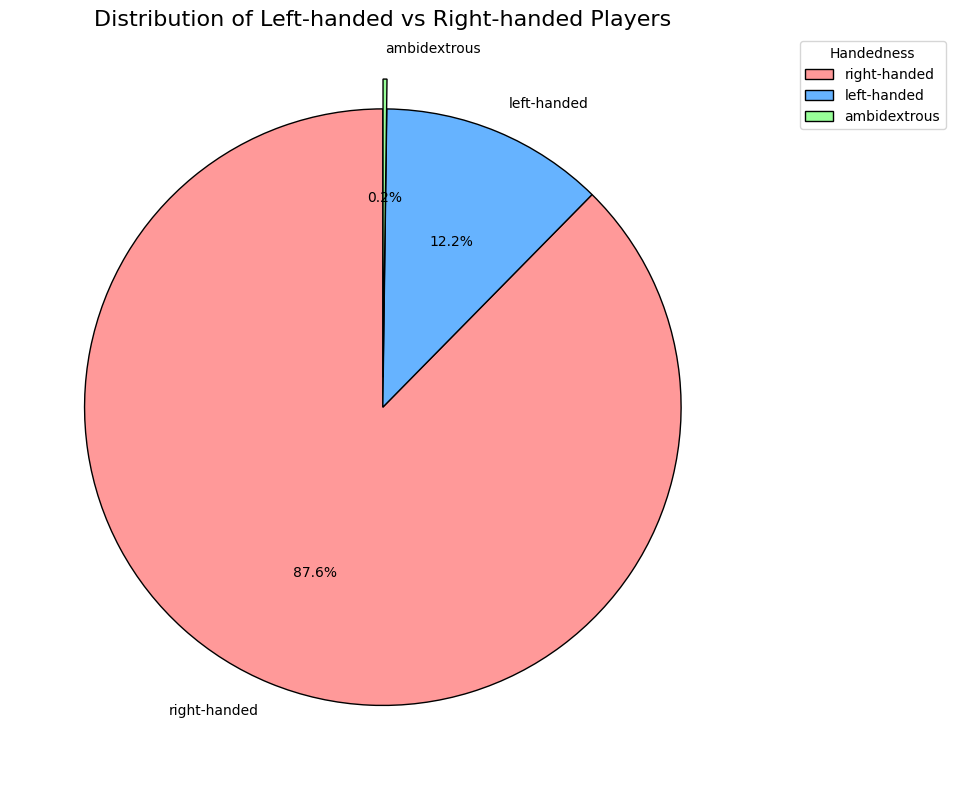

In [152]:
# Assuming grouped_data_frames is your dictionary containing all the dataframes
home_team_df = grouped_data_frames['home_team']
away_team_df = grouped_data_frames['away_team']

# Combine the relevant data to get a comprehensive list of players
combined_players_df = pd.concat([home_team_df[['player_id', 'plays']], away_team_df[['player_id', 'plays']]])

# Drop duplicate players if they appear in both home_team and away_team
players_df = combined_players_df.drop_duplicates(subset=['player_id']).copy()

# Check the unique values in the 'plays' column
unique_plays = players_df['plays'].unique()
print("Unique values in 'plays' column:")
print(unique_plays)

# Check for missing or NaN values
missing_plays = players_df['plays'].isna().sum()
print(f"Number of missing or NaN values in 'plays' column: {missing_plays}")

# Fill or handle missing values (assuming 'unknown' for missing entries)
players_df['plays'] = players_df['plays'].fillna('unknown')

# Calculate the distribution of left-handed vs right-handed players including 'unknown'
handedness_distribution = players_df['plays'].value_counts()

# Print the distribution
print("Initial Distribution of Left-handed vs Right-handed players:")
print(handedness_distribution)

# Impute 'unknown' values based on the distribution of known values
known_values_distribution = players_df['plays'][players_df['plays'] != 'unknown'].value_counts(normalize=True)
print("Known values distribution for imputation:")
print(known_values_distribution)

# Create a mapping function to replace 'unknown' values
def impute_unknown(row):
    if row == 'unknown':
        return np.random.choice(known_values_distribution.index, p=known_values_distribution.values)
    return row

# Apply the mapping function
players_df['plays'] = players_df['plays'].apply(impute_unknown)

# Calculate the distribution after imputation
handedness_distribution_after_imputation = players_df['plays'].value_counts()

# Print the distribution after imputation
print("Distribution of Left-handed vs Right-handed players after imputation:")
print(handedness_distribution_after_imputation)

# Plot the distribution using a pie chart
explode = [0.1 if handedness == "ambidextrous" else 0 for handedness in handedness_distribution_after_imputation.index]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Optional: Define custom colors

plt.figure(figsize=(10, 8))
handedness_distribution_after_imputation.plot(kind='pie', 
                                              autopct='%1.1f%%', 
                                              startangle=90, 
                                              explode=explode, 
                                              colors=colors, 
                                              wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Left-handed vs Right-handed Players', fontsize=16)
plt.ylabel('')  # Hide the y-label
plt.legend(title='Handedness', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h1>
14.What is the most common type of surface used in tournaments?
</h1>

Ground Type Counts:
ground_type
Red clay             14545
Hardcourt outdoor     4712
Hardcourt indoor       257
Synthetic outdoor       94
Name: count, dtype: int64


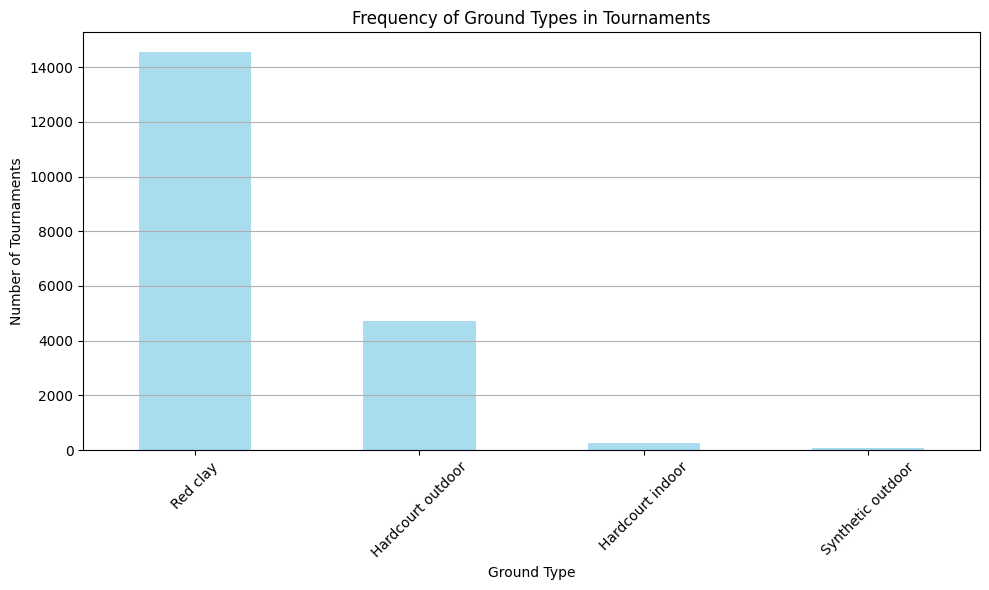

In [158]:
tournament_df = grouped_data_frames['tournament']

# Calculate the value counts of 'ground_type'
ground_type_counts = tournament_df['ground_type'].value_counts()

# Print the counts
print("Ground Type Counts:")
print(ground_type_counts)

# Plotting the counts
plt.figure(figsize=(10, 6))
ground_type_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Frequency of Ground Types in Tournaments')
plt.xlabel('Ground Type')
plt.ylabel('Number of Tournaments')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<h1>15.How many distinct countries are represented in the dataset?
</h1>

In [159]:

home_team_df = grouped_data_frames['home_team']
away_team_df = grouped_data_frames['away_team']

# Combine the country data from both home_team and away_team dataframes
countries = pd.concat([home_team_df['country'], away_team_df['country']])

# Find the number of distinct countries
distinct_countries = countries.nunique()

print(f"Number of distinct countries represented in the dataset: {distinct_countries}")


Number of distinct countries represented in the dataset: 97


<h1>
16.Which player has the highest winning percentage against top 10 ranked opponents?
</h1>

In [167]:
dffi = grouped_data_frames['pbp']
last_row_per_id = dffi.groupby('match_id').last().reset_index()

def determine_winner(row):
    home_has_A = 'A' in str(row['home_point'])
    away_has_A = 'A' in str(row['away_point'])

    if home_has_A and not away_has_A:
        return 0  
    elif away_has_A and not home_has_A:
        return 1  
    elif '40' in [row['home_point'], row['away_point']]:
        return 0 if row['home_point'] == '40' else 1  
    else:
        return None

last_row_per_id['Winner'] = last_row_per_id.apply(determine_winner, axis=1)

df_home_new = grouped_data_frames['home_team']
df_home_new['h/a'] = 0
df_away_new = grouped_data_frames['away_team']
df_away_new['h/a'] = 1

df_home_away = pd.concat([df_home_new, df_away_new])
df_merge_team_pbp = pd.merge(df_home_away, last_row_per_id[['Winner', 'match_id']], on='match_id', how='inner')
df_merge_team_pbp = df_merge_team_pbp[['match_id', 'name', 'gender', 'current_rank', 'h/a', 'Winner']].sort_values(by='match_id')

# Add opponent's rank information
df_home_away['opponent_rank'] = df_merge_team_pbp.groupby('match_id')['current_rank'].shift(-1)
df_merge_team_pbp['opponent_rank'] = df_merge_team_pbp.groupby('match_id')['current_rank'].shift(1)

# Filter matches against top 10 ranked opponents
df_top10_matches = df_merge_team_pbp[df_merge_team_pbp['opponent_rank'] <= 10]

# Calculate wins and matches played against top 10 ranked opponents
wins_top10 = df_top10_matches.groupby('name').agg({'Winner': 'sum', 'match_id': 'count'}).rename(columns={'match_id': 'matches_played'}).reset_index()

# Calculate winning percentage
wins_top10['winning_percentage'] = wins_top10['Winner'] / wins_top10['matches_played'] * 100


# Sort by winning_percentage and matches_played
wins_top10_sorted = wins_top10.sort_values(by=['winning_percentage', 'matches_played'], ascending=[False, False])

# Print the top 3 players
top_3_winning_percentage = wins_top10_sorted.head(3)

for index, row in top_3_winning_percentage.iterrows():
    print(f"Player: {row['name']} | Winning Percentage: {row['winning_percentage']:.2f}% | Matches Played: {row['matches_played']}")


Player: Griekspoor T. | Winning Percentage: 100.00% | Matches Played: 3
Player: Osaka N. | Winning Percentage: 100.00% | Matches Played: 3
Player: Ruud C. | Winning Percentage: 100.00% | Matches Played: 3


<h1>17.What is the average number of breaks of serve per match?
</h1>

Typically, the median number of breaks in a tennis match is 0.0.


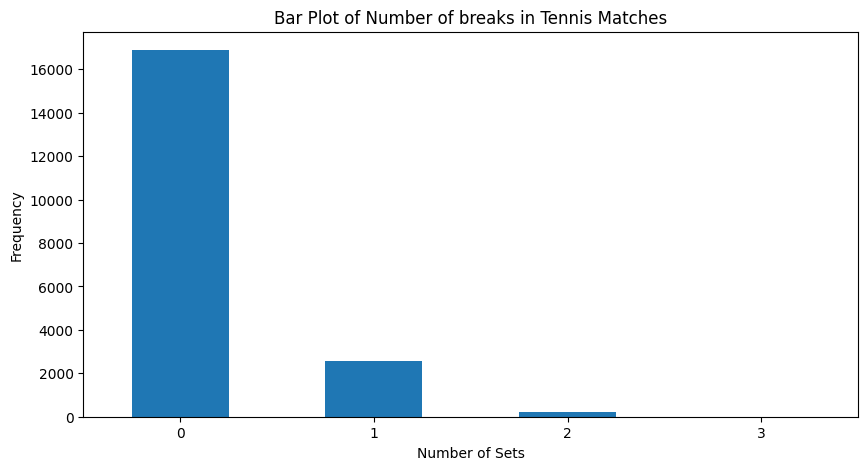

In [168]:
home_team_score_df = grouped_data_frames['home_team_score']

# Select columns period_1_tie_break to period_5_tie_break
period_tie_break_columns = ['period_1_tie_break', 'period_2_tie_break', 'period_3_tie_break', 'period_4_tie_break', 'period_5_tie_break']

# Count non-null values across rows (axis=1)
home_team_score_df['filled_columns_count'] = home_team_score_df[period_tie_break_columns].count(axis=1)

# Find the median of filled_columns_count
median_sets_count = home_team_score_df['filled_columns_count'].median()

print(f"Typically, the median number of breaks in a tennis match is {median_sets_count}.")

# Create a bar plot for the number of break in tennis matches
sets_count = home_team_score_df['filled_columns_count'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sets_count.plot(kind='bar')
plt.title('Bar Plot of Number of breaks in Tennis Matches')
plt.xlabel('Number of Sets')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()



<h2  style="color:lightblue; font-family:Arial, sans-serif; font-size:35px;">

Plot number of breaks split by gender
</h2>

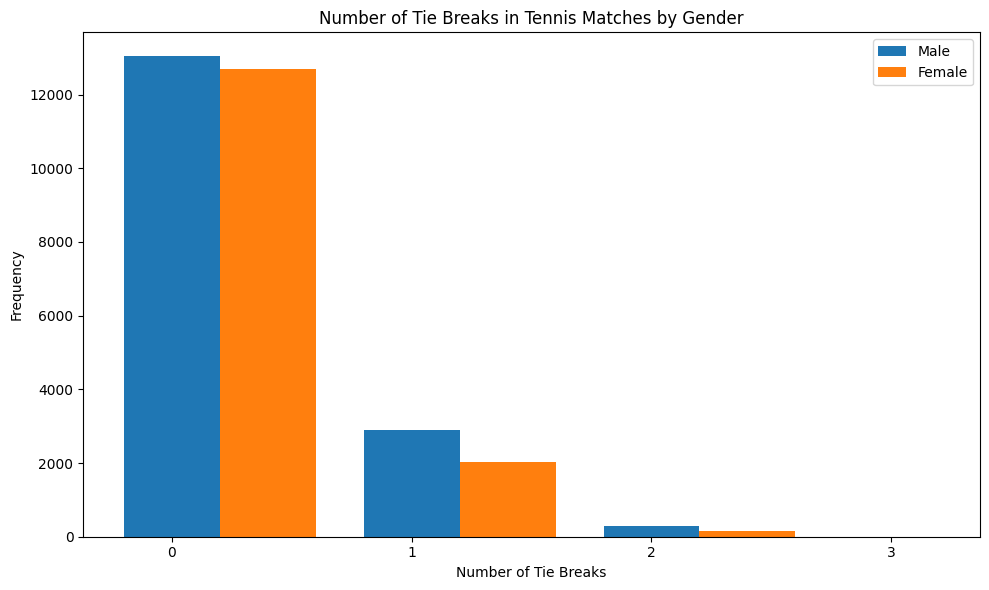

Typically, the median number of tie breaks in a tennis match for males is 0.0.
Typically, the median number of tie breaks in a tennis match for females is 0.0.


In [9]:
# Extract dataframes
home_team_score_df = grouped_data_frames['home_team_score']
home_team_df = grouped_data_frames['home_team']

# Merge with home_team DataFrame to get gender information
home_team_score_df = home_team_score_df.merge(home_team_df[['match_id', 'gender']], on='match_id', how='left')

# Select columns period_1_tie_break to period_5_tie_break
period_tie_break_columns = ['period_1_tie_break', 'period_2_tie_break', 'period_3_tie_break', 'period_4_tie_break', 'period_5_tie_break']

# Count non-null values across rows (axis=1)
home_team_score_df['filled_columns_count'] = home_team_score_df[period_tie_break_columns].count(axis=1)

# Split by gender
male_team_score_df = home_team_score_df[home_team_score_df['gender'] == 'M']
female_team_score_df = home_team_score_df[home_team_score_df['gender'] == 'F']

# Find the median of filled_columns_count for each gender
median_sets_count_male = male_team_score_df['filled_columns_count'].median()
median_sets_count_female = female_team_score_df['filled_columns_count'].median()

# Plotting
plt.figure(figsize=(10, 6))

# Plot for male
plt.bar(male_team_score_df['filled_columns_count'].value_counts().sort_index().index,
        male_team_score_df['filled_columns_count'].value_counts().sort_index().values,
        width=0.4, align='center', label='Male')

# Plot for female
plt.bar(female_team_score_df['filled_columns_count'].value_counts().sort_index().index + 0.4,
        female_team_score_df['filled_columns_count'].value_counts().sort_index().values,
        width=0.4, align='center', label='Female')

plt.title('Number of Tie Breaks in Tennis Matches by Gender')
plt.xlabel('Number of Tie Breaks')
plt.ylabel('Frequency')
plt.xticks(range(int(home_team_score_df['filled_columns_count'].max()) + 1))
plt.legend()
plt.tight_layout()
plt.show()

print(f"Typically, the median number of tie breaks in a tennis match for males is {median_sets_count_male}.")
print(f"Typically, the median number of tie breaks in a tennis match for females is {median_sets_count_female}.")

<h1>
18.What is Percentage of wins among the top 6 ranked players?
</h1>

In [75]:
# Grouping player statistics by name and current_rank
player_stats = df_merge_team_pbp.groupby(['name', 'current_rank']).agg(
    wins=('Winner', lambda x: (x == 0).sum()),  # Counting wins where Winner is 0 (home team)
    games_played=('match_id', 'count')  # Counting total games played
).reset_index()

# Calculating win percentage for each player
player_stats['win_percentage'] = (player_stats['wins'] / player_stats['games_played']) * 100

# Filtering for the best 25 players based on current_rank <= 6, sorting by current_rank
best_25_player_stats = player_stats[player_stats['current_rank'] <= 6].sort_values(by='current_rank').reset_index(drop=True)

# Displaying or further processing best_25_player_stats as needed
best_25_player_stats


,name,current_rank,wins,games_played,win_percentage
0,Djokovic N.,1.0,1,6,16.666667
1,Świątek I.,1.0,7,10,70.000000
2,Sabalenka A.,2.0,5,12,41.666667
3,Sinner J.,2.0,4,4,100.000000
4,Alcaraz C.,3.0,3,5,60.000000
5,Gauff C.,3.0,4,8,50.000000
6,Medvedev D.,4.0,2,3,66.666667
7,Rybakina E.,4.0,2,5,40.000000
8,Zverev A.,4.0,6,8,75.000000
9,Medvedev D.,5.0,0,3,0.000000


<h2  style="color:lightblue; font-family:Arial, sans-serif; font-size:35px;">


Plot
</h2>

C:\Users\IHC\AppData\Local\Temp\ipykernel_2016\3913754419.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=best_25_player_stats, y='name', x='win_percentage', palette='Spectral', ci=None)
C:\Users\IHC\AppData\Local\Temp\ipykernel_2016\3913754419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_25_player_stats, y='name', x='win_percentage', palette='Spectral', ci=None)


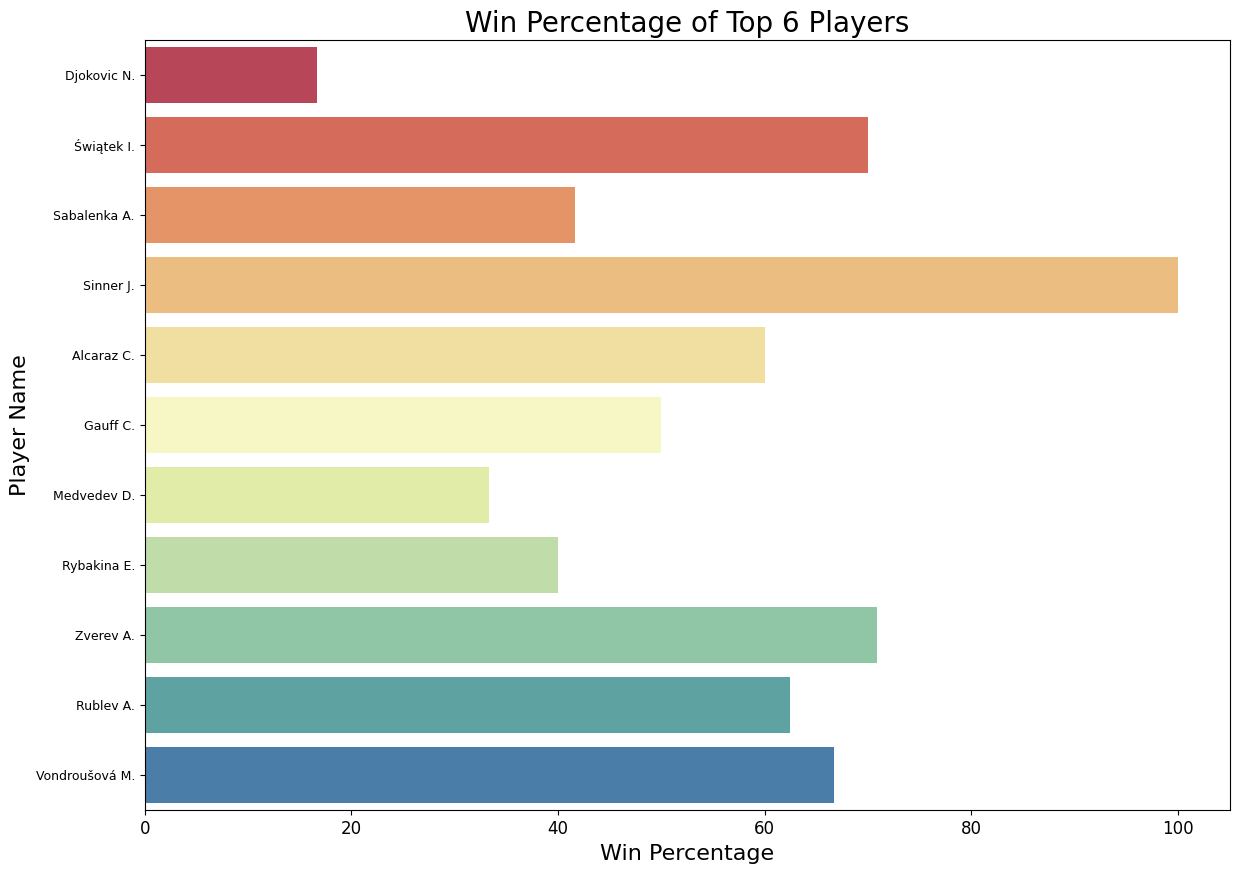

In [43]:
# Plotting
plt.figure(figsize=(14, 10))
sns.set_palette('Spectral')  # Change the color palette

# Horizontal bar plot
sns.barplot(data=best_25_player_stats, y='name', x='win_percentage', palette='Spectral', ci=None)

plt.title('Win Percentage of Top 6 Players', fontsize=20)
plt.xlabel('Win Percentage', fontsize=16)
plt.ylabel('Player Name', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=9)
plt.show()

<h1>
19.Who wins the final game in each tournaments?
</h1>

In [19]:
# Filter for final matches and remove duplicates
final_matches = grouped_data_frames['round'][grouped_data_frames['round']['name'] == 'Final'].reset_index(drop=True)
final_matches = final_matches.drop_duplicates()

# Remove duplicate tournaments
tournament_without_duplicates = grouped_data_frames['tournament'].drop_duplicates()

# Merge final matches with tournaments and remove duplicates
merged_tournament_final_matches = pd.merge(
    final_matches[['match_id', 'round_id', 'name']],
    tournament_without_duplicates[['match_id', 'tournament_name']],
    on='match_id',
    how='inner'
).drop_duplicates()

#Merge with team and play-by-play (pbp) data
merged_df_pbp_tournament = pd.merge(
    df_merge_team_pbp[['match_id', 'name', 'Winner', 'h/a', 'gender']],
    merged_tournament_final_matches,
    on='match_id',
    how='inner'
)

# Filter by matches where the winner is the home/away team and remove duplicates
filtered_df_pbp_tournament = merged_df_pbp_tournament[
    merged_df_pbp_tournament['Winner'] == merged_df_pbp_tournament['h/a']
].drop_duplicates().reset_index(drop=True)

# the filtered DataFrame
filtered_df_pbp_tournament


,match_id,name_x,Winner,h/a,gender,round_id,name_y,tournament_name
0,12303219,Snigur D.,0,0,F,29,Final,"Lopota, Singles Main, W-ITF-GEO-02A"
1,12261565,Świątek I.,0,0,F,29,Final,"Madrid, Spain"
2,12276771,Schoolkate T.,0,0,M,29,Final,"Guangzhou, China"
3,12305661,Agwi M.,0,0,M,29,Final,"Antalya, Singles Main, M-ITF-TUR-17A"
4,12305681,El Aouni A.,0,0,F,29,Final,"Antalya, Singles Main, W-ITF-TUR-17A"
...,...,...,...,...,...,...,...,...
117,12367888,Juszczak P.,1,1,M,29,Final,"Brcko, Singles Main, M-ITF-BIH-03A"
118,12368105,Radivojevic L.,1,1,F,29,Final,"Kursumlijska Banja, Singles Main, W-ITF-SRB-07A"
119,12368182,Samsonova L.,1,1,F,29,Final,"Bol, Singles Main, W-ITF-CRO-05A"
120,12368223,Bielinskyi V.,1,1,M,29,Final,"Bol, Singles Main, M-ITF-CRO-07A"


<h1>
20.top 20 players with most tournament participation
</h1>

In [11]:
# Data you provided
home_team = grouped_data_frames['home_team']
away_team = grouped_data_frames['away_team']

# Combine home and away team info into one DataFrame
players_info = pd.concat([
    home_team[['match_id', 'player_id', 'full_name']],
    away_team[['match_id', 'player_id', 'full_name']]
]).drop_duplicates().reset_index(drop=True)

# Merge player info with tournament info
merged_df = pd.merge(players_info, grouped_data_frames['tournament'][['tournament_id', 'match_id', 'tournament_name']], on='match_id', how='inner').drop_duplicates()

# Drop the match_id column
merged = merged_df.drop('match_id', axis=1)

# Count the number of unique tournaments for each player
tournament_counts = merged_df.groupby('full_name')['tournament_name'].nunique()

# Get the top 20 players with the most tournament participation
top_20_players = tournament_counts.nlargest(20)

<h2  style="color:lightblue; font-family:Arial, sans-serif; font-size:35px;">


barplot for top 20 players with most tournament participation
</h2>

C:\Users\IHC\AppData\Local\Temp\ipykernel_2016\1511507167.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_players.values, y=top_20_players.index, palette="viridis")


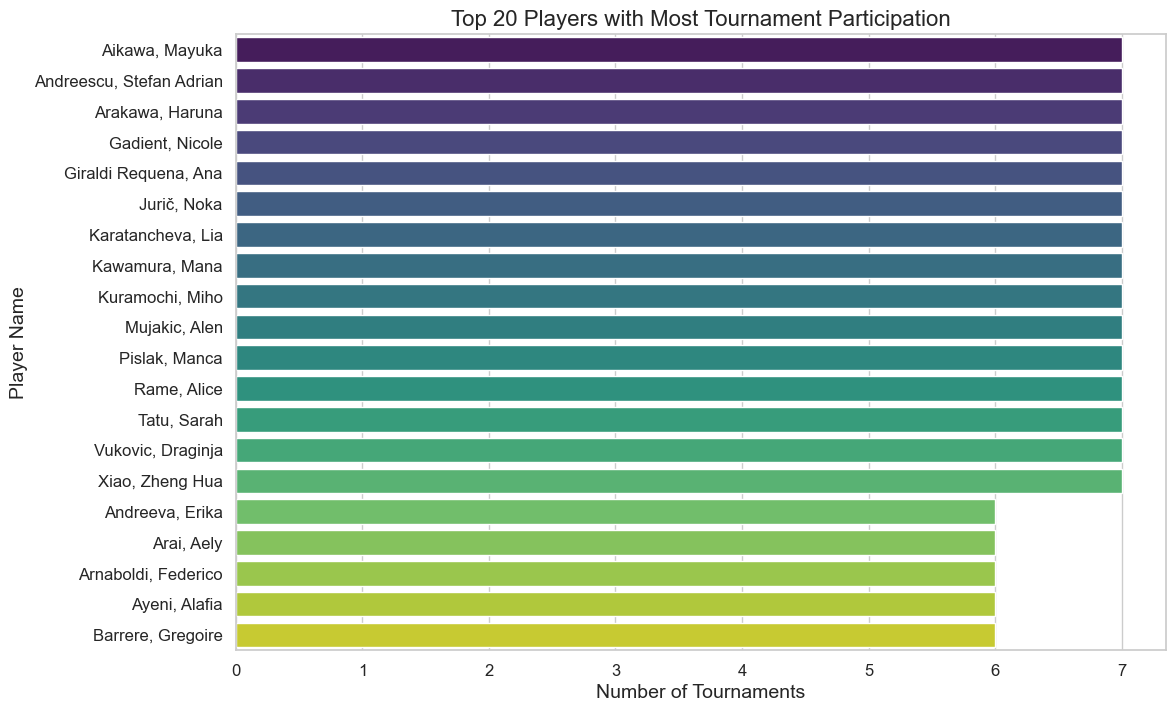

In [84]:


# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_players.values, y=top_20_players.index, palette="viridis")

plt.title('Top 20 Players with Most Tournament Participation', fontsize=16)
plt.xlabel('Number of Tournaments', fontsize=14)
plt.ylabel('Player Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h1>
21.What is the average weight of the players?
</h1>

In [14]:
df_cleaned_away_team = grouped_data_frames['away_team'].dropna(subset=['gender'])
df_cleaned_home_team = grouped_data_frames['home_team'].dropna(subset=['gender'])

#We remove the rows that have missing values in the gender column.

df_concat_gender=pd.concat([df_cleaned_home_team[['player_id','full_name','gender','weight']],df_cleaned_away_team[['player_id','full_name','gender','weight']]]).drop_duplicates().reset_index(drop=True)

mean_weight_male_with_null = df_concat_gender[df_concat_gender['gender'] == 'M']['weight'].mean()
mean_weight_female_with_null = df_concat_gender[df_concat_gender['gender'] == 'F']['weight'].mean()

num_missing = df_concat_gender['gender'].isna().sum()

def fill_height(row):
    if pd.isna(row['weight']):
        if row['gender'] == 'M':
            return mean_weight_male_with_null
        elif row['gender'] == 'F':
            return mean_weight_female_with_null
    return row['weight']


df_concat_gender['weight'] = df_concat_gender.apply(fill_height, axis=1)

mean_weight_male = df_concat_gender[df_concat_gender['gender'] == 'M']['weight'].mean()
mean_weight_female = df_concat_gender[df_concat_gender['gender'] == 'F']['weight'].mean()
mean_weight_players=df_concat_gender['weight'].mean()


print(f'The average weight of female players is {mean_weight_female} ')
print(f'The average weight of male players is {mean_weight_male}')
print(f'The average weight of players is {mean_weight_players}')

The average weight of female players is 63.74489795918368 
The average weight of male players is 77.2742268041237
The average weight of players is 70.72573188812376


<h2  style="color:lightblue; font-family:Arial, sans-serif; font-size:35px;">


Plot
</h2>

C:\Users\Amir\AppData\Local\Temp\ipykernel_10540\2700473932.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(average_weights.keys()), y=list(average_weights.values()), palette='viridis')


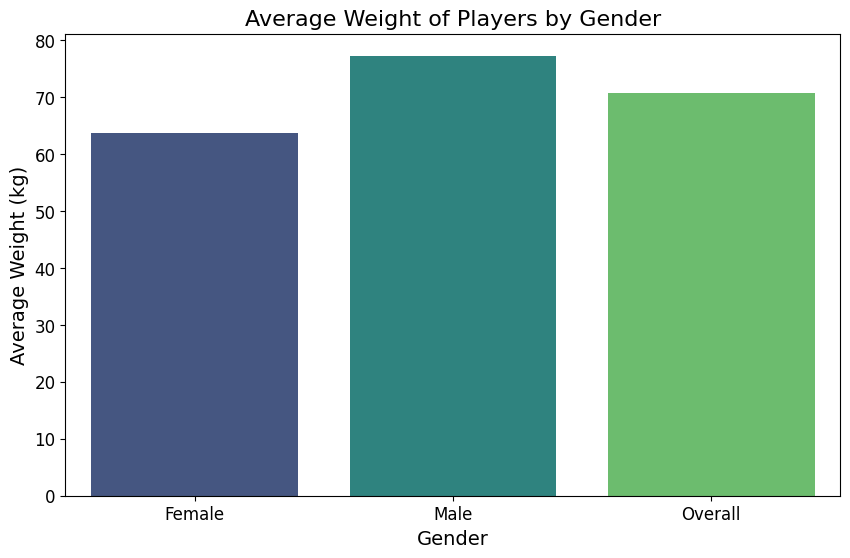

In [15]:
plt.figure(figsize=(10, 6))
average_weights = {
    'Female': mean_weight_female,
    'Male': mean_weight_male,
    'Overall': mean_weight_players
}
sns.barplot(x=list(average_weights.keys()), y=list(average_weights.values()), palette='viridis')

plt.title('Average Weight of Players by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Weight (kg)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h1>
22.find top 10 players with most aces points in this month
</h1>

In [87]:
ACES = grouped_data_frames['statistics'][grouped_data_frames['statistics']['statistic_name'] == 'aces']
FINAL_ACES = ACES[ACES['period'] == 'ALL'].drop_duplicates().reset_index(drop=True)

# Creating dataframes for home and away teams
df_home_new = grouped_data_frames['home_team']
df_home_new['h/a'] = 0  # Marking as home team

df_away_new = grouped_data_frames['away_team']
df_away_new['h/a'] = 1  # Marking as away team

# Concatenating home and away team dataframes, sorting and dropping duplicates
df_home_away = pd.concat([df_home_new, df_away_new]).sort_values(by='match_id').drop_duplicates()

# Merging team data with ace statistics on match ID
df_merge_team_ace = pd.merge(df_home_away[['match_id', 'name', 'gender', 'h/a']], FINAL_ACES[['match_id', 'home_stat', 'away_stat']], on='match_id', how='inner').drop_duplicates()

# Converting ace statistics to numeric values
df_merge_team_ace['home_stat'] = pd.to_numeric(df_merge_team_ace['home_stat'])
df_merge_team_ace['away_stat'] = pd.to_numeric(df_merge_team_ace['away_stat'])

# Determining team's ace statistic based on home or away status
df_merge_team_ace['stat'] = df_merge_team_ace.apply(lambda row: row['home_stat'] if row['h/a'] == 0 else row['away_stat'], axis=1)

# Grouping by team name and summing ace statistics
team_stats = df_merge_team_ace.groupby('name')['stat'].sum().reset_index(name='total_stat').drop_duplicates()

# Counting occurrences of each team
team_counts = df_merge_team_ace['name'].value_counts().reset_index()
team_counts.columns = ['name', 'count']

# Merging counts and total statistics, sorting by total statistic in descending order
result = pd.merge(team_counts, team_stats, on='name').sort_values(by='total_stat', ascending=False).reset_index(drop=True)

# Selecting the top 10 teams by total statistic
top_10_teams = result.head(10)


barplot for top 10 players who have the most aces

C:\Users\IHC\AppData\Local\Temp\ipykernel_2016\1353497046.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_teams, x='total_stat', y='name', palette='viridis', edgecolor='w')


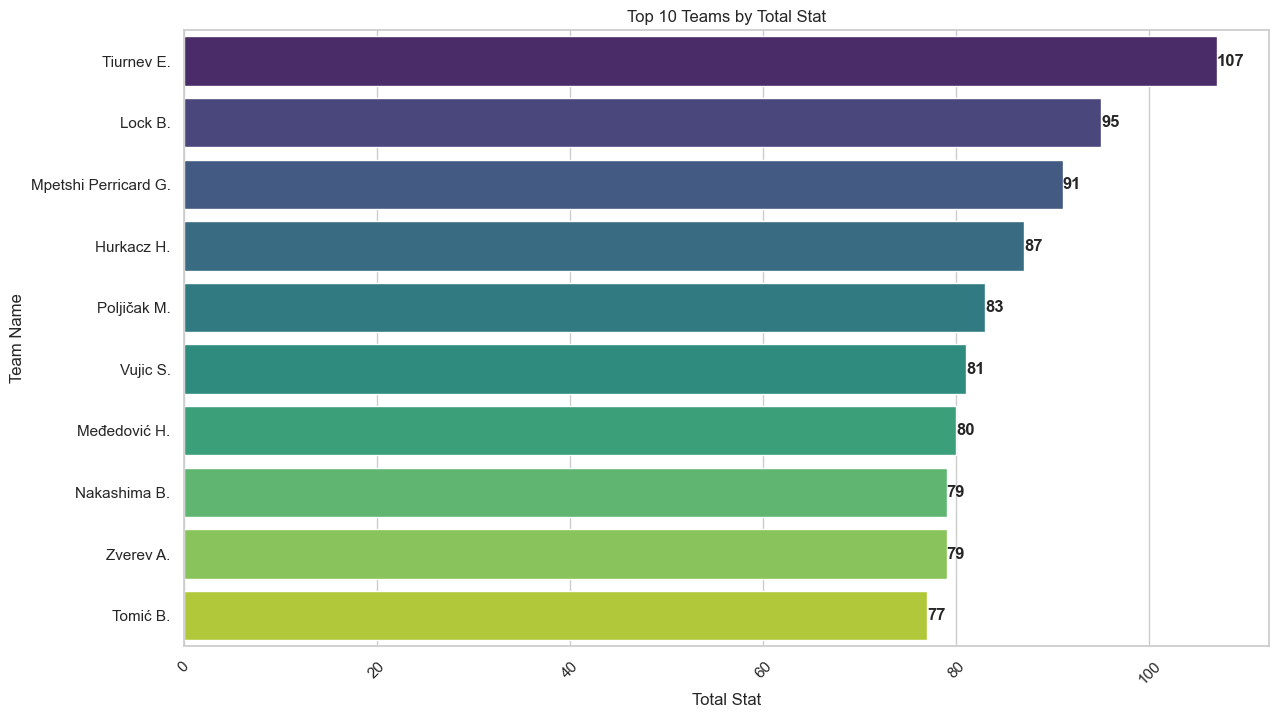

In [86]:
# Plot the first 10 teams by total_stat

# Set the seaborn style for better aesthetics
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_teams, x='total_stat', y='name', palette='viridis', edgecolor='w')

# Add value labels on the bars
for index, value in enumerate(top_10_teams['total_stat']):
    plt.text(value, index, f'{value:.0f}', ha='left', va='center', fontweight='bold')

plt.xlabel('Total Stat')
plt.ylabel('Team Name')
plt.title('Top 10 Teams by Total Stat')
plt.xticks(rotation=45)
plt.show()

<h1>
23.What is the correlation between those whose rank is among the top 10 and the number of their aces?
</h1>

In [6]:
# Extracting ACE statistics from grouped_data_frames
ACES = grouped_data_frames['statistics'][grouped_data_frames['statistics']['statistic_name'] == 'aces']

# Selecting ACE statistics for all periods and dropping duplicates
FINAL_ACES = ACES[ACES['period'] == 'ALL'].drop_duplicates().reset_index(drop=True)

# Creating dataframes for home and away teams
df_home_new = grouped_data_frames['home_team']
df_home_new['h/a'] = 0  # Marking as home team

df_away_new = grouped_data_frames['away_team']
df_away_new['h/a'] = 1  # Marking as away team

# Concatenating home and away team dataframes, sorting and dropping duplicates
df_home_away = pd.concat([df_home_new, df_away_new]).sort_values(by='match_id').drop_duplicates()

# Merging team data with ACE statistics on match ID
df_merge_team_ace = pd.merge(df_home_away[['match_id', 'name', 'gender', 'h/a', 'current_rank']], FINAL_ACES[['match_id', 'home_stat', 'away_stat']], on='match_id', how='inner').drop_duplicates()

# Converting ACE statistics to numeric values
df_merge_team_ace['home_stat'] = pd.to_numeric(df_merge_team_ace['home_stat'])
df_merge_team_ace['away_stat'] = pd.to_numeric(df_merge_team_ace['away_stat'])

# Determining team's ACE statistic based on home or away status
df_merge_team_ace['stat'] = df_merge_team_ace.apply(lambda row: row['home_stat'] if row['h/a'] == 0 else row['away_stat'], axis=1)

# Grouping by team name, current rank, and gender, summing ACE statistics
team_stats = df_merge_team_ace.groupby(['name', 'current_rank', 'gender'])['stat'].sum().reset_index(name='total_stat').drop_duplicates()

# Counting occurrences of each team
team_counts = df_merge_team_ace['name'].value_counts().reset_index()
team_counts.columns = ['name', 'count']

# Merging counts and total statistics, sorting by total statistic in descending order
result = pd.merge(team_counts, team_stats, on='name').sort_values(by='total_stat', ascending=False).reset_index(drop=True)

# Filtering results for teams with current rank less than 10
filtered_df = result[result['current_rank'] < 10]

# Calculating correlations for male and female teams
correlation_male = filtered_df[filtered_df['gender'] == 'M']['total_stat'].corr(filtered_df[filtered_df['gender'] == 'M']['current_rank'])
correlation_female = filtered_df[filtered_df['gender'] == 'F']['total_stat'].corr(filtered_df[filtered_df['gender'] == 'F']['current_rank'])
total_correlation = filtered_df['total_stat'].corr(filtered_df['current_rank'])

# Function to determine correlation strength
def correlation_strength(correlation):
    if correlation >= 0.7 or correlation <= -0.7:
        return "strong"
    elif abs(correlation) >= 0.3:
        return "moderate"
    else:
        return "weak"

# Determining correlation strengths
total_correlation_strength = correlation_strength(total_correlation)
male_correlation_strength = correlation_strength(correlation_male)
female_correlation_strength = correlation_strength(correlation_female)

# Printing results
print(f"Correlation for males: {correlation_male}")
print(f"Correlation strength for males: {male_correlation_strength}")
print(f"Correlation for females: {correlation_female}")
print(f"Correlation strength for females: {female_correlation_strength}")
print(f"Total correlation: {total_correlation}")
print(f"Correlation strength for total data: {total_correlation_strength}")


Correlation for males: 0.2357642931489974
Correlation strength for total data: weak
Correlation for females: -0.45274081020048734
Correlation strength for total data: moderate
Total correlation: 0.05613886420404405
Correlation strength for total data: weak


<h1>
24.Which country hosted the most games and how many games?
</h1>

In [4]:
# Removing duplicate rows from the 'venue' dataframe in grouped_data_frames
df_venue_without_duplicates = grouped_data_frames['venue'].drop_duplicates()

# Keeping only unique match_id values to count games per match
df_unique = df_venue_without_duplicates.drop_duplicates(subset=['match_id'])

# Counting games hosted per country
games_per_country = df_unique['country'].value_counts()

# Finding the country with the maximum games hosted
max_games_country = games_per_country.idxmax()
max_games_count = games_per_country[max_games_country]

# Printing results
print(f"Country with the maximum games hosted: {max_games_country}")
print(f"Number of games hosted: {max_games_count}")


Country with the maximum games hosted: France
Number of games hosted: 803


<h1>
25.What has been the win percentage of players who played in their own country and had more than 5 games?
</h1>

In [20]:
# Extracting the last row per match ID from 'pbp' group
dffi = grouped_data_frames['pbp']
last_row_per_id = dffi.groupby('match_id').last().reset_index()

# Function to determine the winner based on 'home_point' and 'away_point'
def determine_winner(row):
    home_has_A = 'A' in str(row['home_point'])
    away_has_A = 'A' in str(row['away_point'])

    if home_has_A and not away_has_A:
        return 0  # Home team wins
    elif away_has_A and not home_has_A:
        return 1  # Away team wins
    elif '40' in [row['home_point'], row['away_point']]:
        return 0 if row['home_point'] == '40' else 1  # Determining winner based on '40' score
    else:
        return None  # No winner determined

# Adding 'Winner' column to the last row per match ID
last_row_per_id['Winner'] = last_row_per_id.apply(determine_winner, axis=1)

# Creating new dataframes for home and away teams
df_home_new = grouped_data_frames['home_team']
df_home_new['h/a'] = 0  # Marking as home team

df_away_new = grouped_data_frames['away_team']
df_away_new['h/a'] = 1  # Marking as away team

# Concatenating home and away team dataframes
df_home_away = pd.concat([df_home_new, df_away_new])

# Merging team data with 'Winner' information on match ID
df_merge_team_pbp = pd.merge(df_home_away, last_row_per_id[['Winner', 'match_id']], on='match_id', how='inner')
df_merge_team_pbp = df_merge_team_pbp[['match_id', 'name', 'gender', 'current_rank', 'country', 'h/a', 'Winner']].sort_values(by='match_id').drop_duplicates()

# Merging venue data with team data
df_merge_venue_teamp_pbp = pd.merge(grouped_data_frames['venue'][['match_id', 'country']], df_merge_team_pbp[['name', 'gender', 'country', 'match_id', 'Winner', 'h/a']], on='match_id')
df_merge_venue_teamp_pbp = df_merge_venue_teamp_pbp.rename(columns={'country_y': 'country_player', 'country_x': 'country_tournament'}).drop_duplicates()

# Filtering data where player's country matches tournament's country
filtered_df = df_merge_venue_teamp_pbp[df_merge_venue_teamp_pbp['country_player'] == df_merge_venue_teamp_pbp['country_tournament']]

# Grouping by player name and gender, aggregating wins and games played
grouped = filtered_df.groupby(['name', 'gender']).agg(
    num_wins=('Winner', 'sum'),
    num_games=('Winner', 'size')
).reset_index()

# Calculating win percentage and filtering players with more than 5 games
grouped['win_percentage'] = (grouped['num_wins'] / grouped['num_games']) * 100
grouped = grouped[grouped['num_games'] > 5]

# Sorting by win percentage in descending order
grouped_sorted = grouped.sort_values(by='win_percentage', ascending=False).reset_index()

# Displaying or further processing grouped_sorted as needed
grouped_sorted


,index,name,gender,num_wins,num_games,win_percentage
0,148,Dancu V.,M,6,6,100.000000
1,487,Nishimura K.,F,8,9,88.888889
2,482,Nedic A.,M,5,6,83.333333
3,728,Vojinovic L.,M,5,6,83.333333
4,162,Di Sarra F.,F,5,6,83.333333
...,...,...,...,...,...,...
109,32,Back D.,F,1,7,14.285714
110,328,Kawagishi N.,F,1,7,14.285714
111,492,Oana A.,F,1,9,11.111111
112,651,Simundza J.,M,0,6,0.000000
